In [4]:
from data_utils import load_dataset
import math
import numpy as np
from numpy import linalg as LA
from random import seed
import matplotlib.pyplot as plt

[1.3828098]
[-1.04063798]


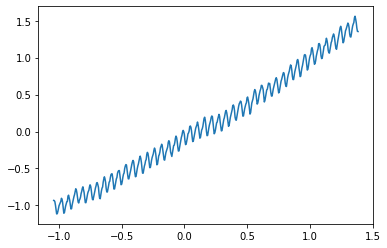

In [5]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('mauna_loa')
plt.plot(x_train, y_train)
print(max(x_train))
print(min(x_train))

In [6]:
def l1(x,y): #manhattan 
    norm = np.sum(abs(x-y))
    #norm = np.linalg.norm([x-y],ord=1)
    return norm

def l2(x,y): #euclidian
    norm = np.linalg.norm([x-y],ord=2)
    return norm

def rmse(x,y):
    return np.sqrt(np.mean(np.square(x-y)))

In [22]:
def phi_matrix(x_train):
    w0 = 2*math.pi/(0.05698)
    x_train_num = x_train.shape[0]
    daphi = np.empty((0, 5), dtype = float)
    for i in range(x_train_num):
        x = x_train[i]
        
        phi_row = np.empty((0,1), dtype = float)
        phi_row1 = np.array([[1]])
        phi_row = np.concatenate((phi_row, phi_row1), axis = 0)
        phi_row2 = np.array([x])
        phi_row = np.concatenate((phi_row, phi_row2), axis = 0)
        phi_row3 = np.array([[math.exp(x)]])
        phi_row = np.concatenate((phi_row, phi_row3), axis = 0)
        phi_row4 = np.array([[math.sin(w0*x)]])
        phi_row = np.concatenate((phi_row, phi_row4), axis = 0)
        phi_row5 = np.array([[math.cos(w0*x)]])
        phi_row = np.concatenate((phi_row, phi_row5), axis = 0)
        
        phi_row = phi_row.transpose()
        
        daphi = np.concatenate((daphi, phi_row), axis = 0)
        
    return daphi

def glm_valid(x_train, x_valid, y_train, y_valid, lambda_list):
    
    #generate the phi matrix
    daphi_train = phi_matrix(x_train)
    #daphi_train
    daphi_valid = phi_matrix(x_valid)
    #print(daphi_train)
    #print(daphi_valid)
    
    #get SVD   
    U, S, Vt = np.linalg.svd(daphi_train)
    
    V = np.transpose(Vt)
    sig = np.diag(S)
    Ut = np.transpose(U)
    
    filler = np.zeros([x_train.shape[0]-S.shape[0], S.shape[0]])
    sig = np.vstack([sig, filler])
    sigT = np.transpose(sig)
    sigTsig = np.dot(sigT, sig)
    
    best_rmse = float('inf')
    # Compute weights
    for l in lambda_list:
        lam_matrix = l*np.eye(len(sigTsig))
        inv = np.linalg.inv(sigTsig + lam_matrix)
        w = np.dot(V, np.dot(inv, np.dot(sigT, np.dot(Ut, y_train))))
        #print(w)
        y_pred = np.dot(daphi_valid, w)
        rmse_valid = rmse(y_valid, y_pred)
        
        if rmse_valid < best_rmse:
            best_rmse = rmse_valid
            l_best = l
            
    print('best lambda: {}'.format(l_best))
    print('best validation RMSE: {}'.format(best_rmse))
            
    return l_best

def glm_test(x_train, x_valid, x_test, y_train, y_valid, y_test, lam):
    
    x_train = np.vstack([x_train, x_valid])
    y_train = np.vstack([y_train, y_valid])
    
    phi_train = phi_matrix(x_train)
    phi_test = phi_matrix(x_test)
    
    #get SVD   
    U, S, Vt = np.linalg.svd(phi_train)
    
    V = np.transpose(Vt)
    sig = np.diag(S)
    Ut = np.transpose(U)
    
    filler = np.zeros([x_train.shape[0]-S.shape[0], S.shape[0]])
    sig = np.vstack([sig, filler])
    sigT = np.transpose(sig)
    sigTsig = np.dot(sigT, sig)
    
    lam_matrix = lam*np.eye(len(sigTsig))
    inv = np.linalg.inv(sigTsig + lam_matrix)
    w = np.dot(V, np.dot(inv, np.dot(sigT, np.dot(Ut, y_train))))
    #print(w)
    y_pred = np.dot(phi_test, w)
    rmse_test = rmse(y_test, y_pred)
    print('test RMSE: {}'.format(rmse_test))
    
    # Let's plot
    plt.plot(x_test, y_test, label="actual value")
    plt.plot(x_test, y_pred, label="prediction")
    plt.title("GLM Estimation")
    plt.xlabel('x_test')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
    

In [23]:
def Q2():
    
    x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('mauna_loa')
    lambda_list = list(range(1,30))
    l_best = glm_valid(x_train, x_valid, y_train, y_valid, lambda_list)
    glm_test(x_train, x_valid, x_test, y_train, y_valid, y_test, l_best)
    
    return True

best lambda: 12
best validation RMSE: 0.04969746423477792
test RMSE: 0.0727917777052256


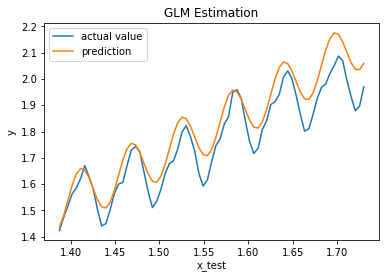

True

In [24]:
Q2()